# Pandas Exercise: Jeopardy Dataset

### Preliminary Settings

First of all, I'll download the dataset from [Kaggle](https://www.kaggle.com/tunguz/200000-jeopardy-questions) using their dedicated API.

In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('tunguz/200000-jeopardy-questions', unzip=True)

Let's start by loading the .csv file into a pandas DataFrame. I'll import pandas and use its `read_csv` function.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
df = pd.read_csv("JEOPARDY_CSV.csv")

Let's examine the file.

In [3]:
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams


There seems to be a problem of empty spaces in the column names. Let's use `.split()` to fix it.

In [4]:
print(df.columns)

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')


In [5]:
df.rename(columns = {column_name : column_name.strip() for column_name in df.columns}, inplace = True)
print(df.columns)
df.head()

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')


,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams


### Question Searcher and Filter

Let's create a function that looks up certain questions based on a list of words. This function takes in a list of words and then returns only those rows where all words from the list are found in the "Question" column.
Please note that some fiddling was required in order to make the filter work regardless of capitalization (list comprehensions that use the `.lower()` function and, in the case of the question string, the `.split()` function).
The essential formula to check whether all the words in a list appear in a string is:
```
all([word in string for word in list])
```
The function `all()` returns a boolean based on whether all values in a list are True or not.

In [6]:
def filter_questions(wordlist):
    return df[df.apply(lambda row: all([
        word in [string.lower() for string in row["Question"].split(" ")] for word in [string.lower() for string in wordlist]
    ]), axis = 1)]

Let's test the function.

In [7]:
kingly_wordlist = ["king"]
kingly_jeopardy = filter_questions(kingly_wordlist)
print(kingly_jeopardy)

        Show Number    Air Date             Round                    Category  \
40             4680  2004-12-31  Double Jeopardy!  DR. SEUSS AT THE MULTIPLEX   
781            4335  2003-06-06         Jeopardy!                   MY PLACE?   
811            4335  2003-06-06  Double Jeopardy!                 "S"-OTERICA   
846            4541  2004-05-10         Jeopardy!                 U.S. STATES   
896            3834  2001-04-12         Jeopardy!          AIN'T THAT AMERICA   
...             ...         ...               ...                         ...   
216232         1251  1990-01-29         Jeopardy!                THANKS, GUYS   
216445         3644  2000-06-08   Final Jeopardy!                   THE BIBLE   
216612         2046  1993-06-28  Double Jeopardy!             BIBLICAL PEOPLE   
216752         5070  2006-09-29         Jeopardy!                 SIGNING OFF   
216777         5070  2006-09-29  Double Jeopardy!             ANCIENT HISTORY   

        Value  \
40      $1

### Calculating Average Cost for Certain Topics

To help with the following statistical calculations, let's convert the values contained in the "Value" column into floats (they're currently strings).
Note that we need to fiddle with the data 

In [8]:
df["Value"] = df.apply(lambda row: float(row["Value"].strip("$").replace(",", "")) if row["Value"] != "None" else 0, axis = 1)
print(df.head())

   Show Number    Air Date      Round                         Category  Value  \
0         4680  2004-12-31  Jeopardy!                          HISTORY  200.0   
1         4680  2004-12-31  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES  200.0   
2         4680  2004-12-31  Jeopardy!      EVERYBODY TALKS ABOUT IT...  200.0   
3         4680  2004-12-31  Jeopardy!                 THE COMPANY LINE  200.0   
4         4680  2004-12-31  Jeopardy!              EPITAPHS & TRIBUTES  200.0   

                                                                                                      Question  \
0             For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory   
1  No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves   
2                     The city of Yuma in this state has a record average of 4,055 hours of sunshine each year   
3                         In 1963, live on "The Art Linkl

We can now check the average cost of questions associated with particular topics. Let's use a function to calculate that. We will add an if/else condition in case the function finds no questions associated with a particular topic.

In [9]:
def average_value_for_topics(wordlist):
    avg_value = filter_questions(wordlist)["Value"].mean()
    if pd.isna(avg_value):
        print("There are no questions about " + " and ".join(wordlist) + ".")
    else:
        print("The average value of questions concerning " + " and ".join(wordlist) + " is " + str(avg_value) + ".")
    return avg_value

Let's test the function.

In [10]:
average_value_for_topics(["king","england"])
average_value_for_topics(["walt disney"])
average_value_for_topics(["burger"])
average_value_for_topics(["country", "war"])

The average value of questions concerning king and england is 829.7297297297297.
There are no questions about walt disney.
The average value of questions concerning burger is 650.0.
The average value of questions concerning country and war is 853.0.


853.0

### Listing Unique Answers

Next item: create a function that counts the count of unique answers in a given dataset. Simple enough!

In [11]:
unique_answers = lambda unique_answers : unique_answers.groupby("Answer")["Question"].nunique().sort_values(ascending=False)

Let's test the function with the whole dataset.

In [12]:
print(unique_answers(df).head())

Answer
China        214
Australia    213
Japan        194
Chicago      193
France       189
Name: Question, dtype: int64


Let's test the function with questions about "king."

In [13]:
print(unique_answers(filter_questions(["king"])))

Answer
Henry VIII     41
Solomon        23
Sweden         23
Norway         22
Richard III    21
               ..
India           1
Ireland         1
Isabella        1
Islam           1
zlati           1
Name: Question, Length: 1165, dtype: int64


## Additional Challenges

### First: Questions that used the word "computer" in the 90s and in the 2000s

In [14]:
computer_list = filter_questions(["computer"])

In [15]:
air_dates = pd.to_datetime(computer_list["Air Date"], format = "%Y-%m-%d").reset_index()
air_dates["year"] = pd.DatetimeIndex(air_dates["Air Date"]).year
air_dates["decade"] = air_dates["year"] - (air_dates["year"] % 10)
years = air_dates.groupby(["year"]).index.count().reset_index()
decades = air_dates.groupby(["decade"]).index.count().reset_index()
print(years)
print(decades)

    year  index
0   1984      1
1   1986      1
2   1987      1
3   1988      1
4   1989      1
5   1990      3
6   1991      1
7   1993      1
8   1995      2
9   1996      4
10  1997     16
11  1998     15
12  1999     24
13  2000     22
14  2001     11
15  2002      9
16  2003     15
17  2004     17
18  2005     23
19  2006     26
20  2007     28
21  2008     21
22  2009     25
23  2010     25
24  2011     18
25  2012      4
   decade  index
0    1980      5
1    1990     66
2    2000    197
3    2010     47


In [16]:
for x in range(1984, 2012):
    if years[years.year == x].empty:
        years = years.append({"year": x, "index": 0}, ignore_index = True, sort = True)
years = years.sort_values(by="year").reset_index(drop=True)

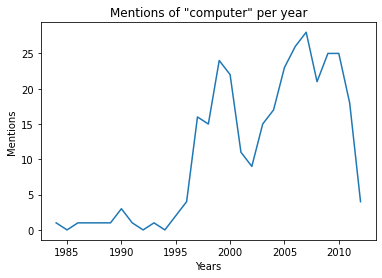

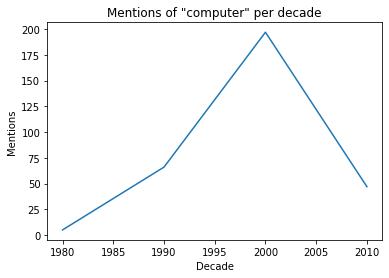

In [17]:
plt.plot(years["year"], years["index"])
plt.title('Mentions of "computer" per year')
plt.ylabel("Mentions")
plt.xlabel("Years")
plt.show()
plt.title('Mentions of "computer" per decade')
plt.ylabel("Mentions")
plt.xlabel("Decade")
plt.plot(decades["decade"], decades["index"])
plt.show()

### Distributions of categories for each round

In [18]:
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,200.0,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200.0,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200.0,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200.0,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200.0,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams


In [19]:
round_names = df["Round"].unique()
print(round_names)
round_categories = lambda round_categories : df[
    df["Round"] == round_categories].groupby(["Category"]).Answer.count().sort_values().reset_index()
jeopardy_categories = round_categories("Jeopardy!")
double_jeopardy_categories = round_categories("Double Jeopardy!")
final_jeopardy_categories = round_categories("Final Jeopardy!")
tiebreaker_categories = round_categories("Tiebreaker")


['Jeopardy!' 'Double Jeopardy!' 'Final Jeopardy!' 'Tiebreaker']


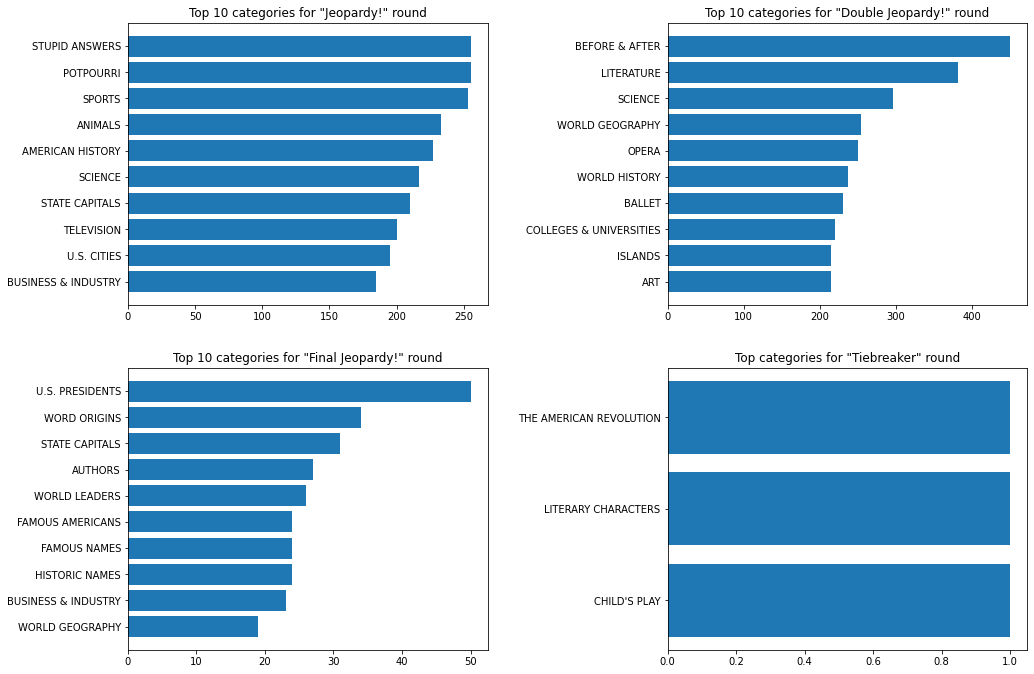

In [20]:
plot_categories = lambda plot_categories : plt.barh(plot_categories.tail(10)["Category"], plot_categories.tail(10)["Answer"])

plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plot_categories(jeopardy_categories)
plt.title('Top 10 categories for "Jeopardy!" round')
plt.subplot(2, 2, 2)
plot_categories(double_jeopardy_categories)
plt.title('Top 10 categories for "Double Jeopardy!" round')
plt.subplot(2, 2, 3)
plot_categories(final_jeopardy_categories)
plt.title('Top 10 categories for "Final Jeopardy!" round')
plt.subplot(2, 2, 4)
plot_categories(tiebreaker_categories)
plt.title('Top categories for "Tiebreaker" round')
plt.tight_layout(pad=3.0)
plt.show()